# Hidden Markov Model with `hmmlearn`
> [Reference](https://hmmlearn.readthedocs.io/en/latest/index.html)

### Import libraries

In [1]:
!pip3 install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from collections import defaultdict
import itertools
import math
import pickle
import random

from hmmlearn.hmm import MultinomialHMM, GaussianHMM
from hmmlearn.base import ConvergenceMonitor
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import as_strided as ast
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

plt.style.use('seaborn-white')

In [3]:
# Ref https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(y_true, y_pred,
                          target_names=None, title='Confusion matrix', cmap=plt.get_cmap('Blues'), normalize=False, figsize=(8,6)):
    '''
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    '''
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## 1. Dice

### 1.1. Evaluation
Probability of given observation with given model

In [4]:
model = MultinomialHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations
model.n_features = 6

# Model (Start probability, transition probability, emission probability)
model.startprob_ = [0.5, 0.5]
model.transmat_ = [
    [0.95, 0.05],
    [0.05, 0.95],
]
model.emissionprob_ = [
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [5]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [6]:
# Evaluation
model.score(X) # return log(probability)

-71.28707008782621

#### # Exercise
Write your code in the cells below. (8min)
1. Change Observations
2. Evaluate the probability
3. Repeat 1~2 with different observations

In [7]:
# 1. Change Observations



# 2. Evaluate the probability



# 3. Repeat 1~2 with different observations




### 1.2. Decoding
Most likely sequence of states with given observations and model

In [8]:
model = MultinomialHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations
model.n_features = 6

# Model (Start probability, transition probability, emission probability)
model.startprob_ = [0.5, 0.5]
model.transmat_ = [
    [0.95, 0.05],
    [0.05, 0.95],
]
model.emissionprob_ = [
    [ 1/6,  1/6,  1/6,  1/6,  1/6, 1/6],
    [1/10, 1/10, 1/10, 1/10, 1/10, 1/2],
]

In [9]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [10]:
# Decoding
model.decode(X)

(-74.25710830623268,
 array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]))

#### # Exercise
Write your code in the cells below. (8min)
1. Change Observations
2. Decode the observations
3. Repeat 1~2 with different observations

In [11]:
# 1. Change Observations



# 2. Decode the observations



# 3. Repeat 1~2 with different observations




### 1.3. Learning
Most likely model with given observations

In [38]:
model = MultinomialHMM(n_components=2, verbose=True, n_iter=20)

In [39]:
# Observations
X = np.array([1,2,4,5,5,2,6,4,6,2,1,4,6,1,4,6,1,3,6,1,3,6,6,6,1,6,6,4,6,6,1,6,3,6,6,1,6,3,6,6,1,6,3,6,1]).reshape(-1,1) - 1

In [40]:
# Learning
model.fit(X)

         1         -80.5773             +nan
         2         -67.4187         +13.1586
         3         -67.2890          +0.1297
         4         -67.1913          +0.0977
         5         -67.1214          +0.0699
         6         -67.0684          +0.0529
         7         -67.0206          +0.0478
         8         -66.9686          +0.0520
         9         -66.9055          +0.0632
        10         -66.8249          +0.0805
        11         -66.7210          +0.1040
        12         -66.5872          +0.1338
        13         -66.4170          +0.1702
        14         -66.2034          +0.2136
        15         -65.9406          +0.2629
        16         -65.6267          +0.3139
        17         -65.2693          +0.3574
        18         -64.8896          +0.3796
        19         -64.5212          +0.3684
        20         -64.1999          +0.3213


MultinomialHMM(n_components=2, n_iter=20,
               random_state=RandomState(MT19937) at 0x7F0D67168490,
               verbose=True)

#### 1.3.1. Inside of the Trained Model

In [41]:
model.emissionprob_

array([[0.00280143, 0.09733098, 0.1029823 , 0.11337211, 0.04320068,
        0.64031249],
       [0.65700587, 0.00590513, 0.1272184 , 0.10663092, 0.04690898,
        0.05633069]])

In [42]:
model.startprob_

array([5.46195618e-20, 1.00000000e+00])

In [43]:
model.transmat_

array([[0.54961386, 0.45038614],
       [0.95549784, 0.04450216]])

### 1.4. Predict
Predict next observations and states

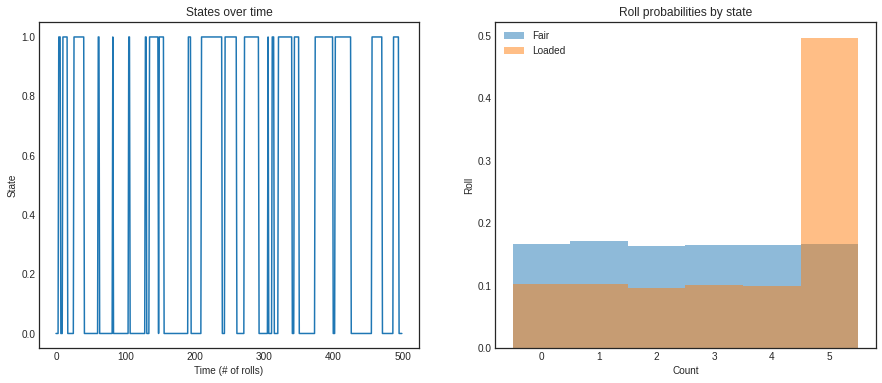

In [44]:
model = MultinomialHMM(n_components=2, random_state=0)

model.startprob_ = np.array([1.0, 0.0])

model.transmat_ = np.array([[0.95, 0.05],
                            [0.1, 0.9]])

model.emissionprob_ = np.array([[1/6,  1/6,  1/6,  1/6,  1/6,  1/6],
                                [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]])

observations, states = model.sample(n_samples=30000)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax = axes[0]
ax.plot(states[:500])
ax.set_title('States over time')
ax.set_xlabel('Time (# of rolls)')
ax.set_ylabel('State')

ax = axes[1]
ax.hist(observations[states == 0], label='Fair',   alpha=0.5, bins=np.arange(7) - 0.5, density=True)
ax.hist(observations[states == 1], label='Loaded', alpha=0.5, bins=np.arange(7) - 0.5, density=True)
ax.set_title('Roll probabilities by state')
ax.set_xlabel('Count')
ax.set_ylabel('Roll')
ax.legend()

plt.show()

In [46]:
X_train = observations[:observations.shape[0] // 2]
X_val = observations[observations.shape[0] // 2:]

# check optimal score
score = model.score(X_val)

best_score = best_model = None
n_fits = 50
for idx in range(n_fits):
    model = MultinomialHMM(n_components=2, random_state=idx, init_params='se')  # don't init transition
    model.transmat_ = np.array([np.random.dirichlet([0.9, 0.1]), np.random.dirichlet([0.1, 0.9])])
    model.fit(X_train)
    score = model.score(X_val)
    print(f'Model #{idx}\tScore: {score}')
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {score}\nBest score: {best_score}')

Model #0	Score: -26288.633614814444
Model #1	Score: -26288.725375734095
Model #2	Score: -26290.774584793584
Model #3	Score: -26129.24016718153
Model #4	Score: -26102.940677867377
Model #5	Score: -26134.551369770434
Model #6	Score: -26237.870704907084
Model #7	Score: -26139.385372739638
Model #8	Score: -26193.911222502134
Model #9	Score: -26288.725564091572
Model #10	Score: -26147.893129528205
Model #11	Score: -26288.45836635982
Model #12	Score: -26158.675698445466
Model #13	Score: -26179.660959955694
Model #14	Score: -26115.03493828863
Model #15	Score: -26109.61320562026
Model #16	Score: -26265.282046699314
Model #17	Score: -26161.37674354536
Model #18	Score: -26284.082126556284
Model #19	Score: -26287.639406322145
Model #20	Score: -26140.773944035533
Model #21	Score: -26270.842256252876
Model #22	Score: -26113.8998578921
Model #23	Score: -26288.725564091572
Model #24	Score: -26288.63360979225
Model #25	Score: -26298.180441311346
Model #26	Score: -26135.237587906086
Model #27	Score: -2

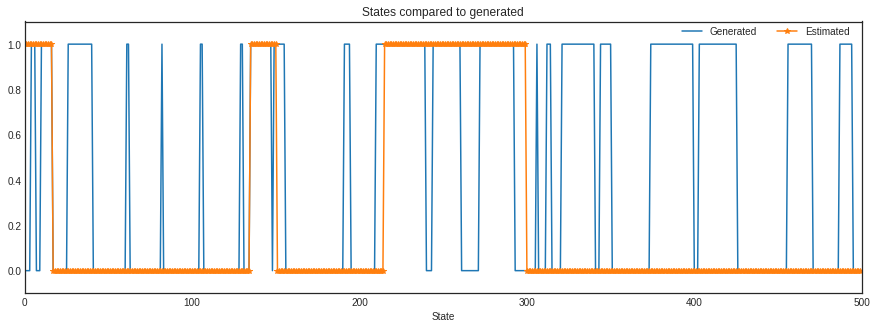

In [60]:
pred_states = best_model.predict(observations)

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(states[:500],      label='Generated')
ax.plot(pred_states[:500], marker='*', label='Estimated')

ax.set_xlim(0, 500)
ax.set_ylim(-0.1, 1.1)
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# observations)')
ax.set_xlabel('State')
ax.legend(ncol=2, loc=[0.78, 0.93])
plt.show()

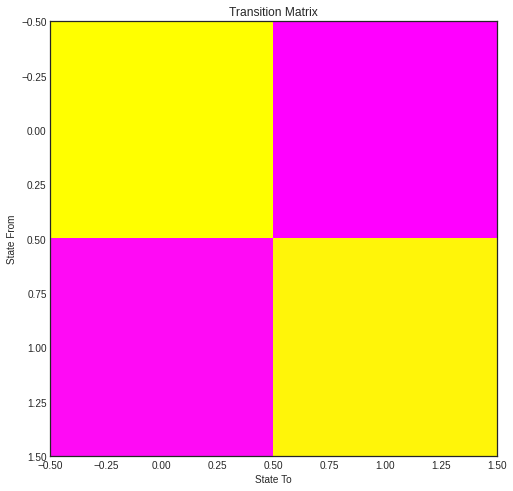

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(best_model.transmat_, aspect='auto', cmap='spring')

ax.set_title('Transition Matrix')
ax.set_xlabel('State To')
ax.set_ylabel('State From')

plt.show()

---
## 2. HAR with HMM
### 2.1. Using Segments
#### 2.1.1. Load data

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
with open('/content/drive/MyDrive/HAR_segments_for_HMM.pkl', 'rb') as f:
    X, y = pickle.load(f)

print(type(X), type(y), len(X), len(y))
print(type(X[0]), X[0].shape, set(y))

<class 'list'> <class 'list'> 30 30
<class 'numpy.ndarray'> (3072, 3) {'running', 'walking', 'standing'}


#### 2.1.2. Plot data

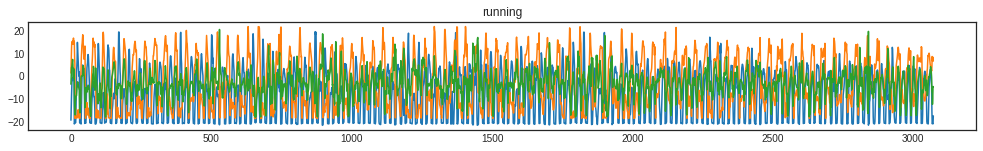

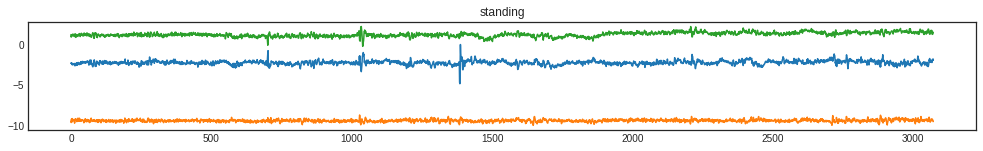

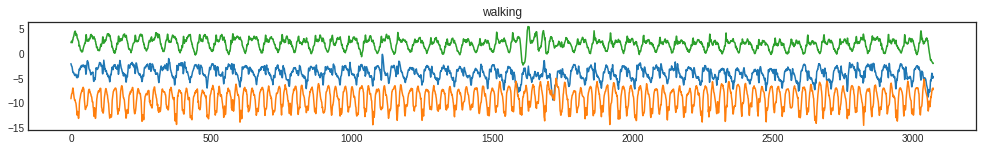

In [23]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(y[0])
plt.plot(X[0])
plt.show()

plt.title(y[10])
plt.plot(X[10])
plt.show()

plt.title(y[20])
plt.plot(X[20])
plt.show()

#### 2.1.3. Map Label

In [24]:
# Mapping label
classes = sorted(list(set(y)))
class_to_index = {c:i for i, c in enumerate(classes)}
index_to_class = {i:c for i, c in enumerate(classes)}
print(class_to_index)

{'running': 0, 'standing': 1, 'walking': 2}


#### 2.1.4. Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [25]:
# Make HMM models per motion classes
hmms = [GaussianHMM(n_components=5, n_iter=30) for c in classes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Process training data
X_train_dict = defaultdict(lambda: [])
lengths_dict = defaultdict(lambda: [])
for segment, motion in zip(X_train, y_train):
    X_train_dict[motion].append(segment)
    lengths_dict[motion].append(segment.shape[0])

# Fit HMM models per motion classes
for motion in classes:
    X_concat = np.vstack(X_train_dict[motion])
    lengths = lengths_dict[motion]
    
    hmms[class_to_index[motion]].fit(X_concat, lengths)

#### 2.1.5. Test Model

In [26]:
def _predict(segment):
    '''
    Evaluate with multiple HMMs (HMM model per motion class)
    Choose most likely motion class
    '''
    probs = [hmm.score(segment) for hmm in hmms]
    index = np.argmax(probs)
    return index_to_class[index]

def predict(segments):
    return [_predict(segment) for segment in segments]
    
y_pred = predict(X_test)
y_true = y_test

              precision    recall  f1-score   support

     running       1.00      1.00      1.00         3
    standing       1.00      0.33      0.50         3
     walking       0.60      1.00      0.75         3

    accuracy                           0.78         9
   macro avg       0.87      0.78      0.75         9
weighted avg       0.87      0.78      0.75         9



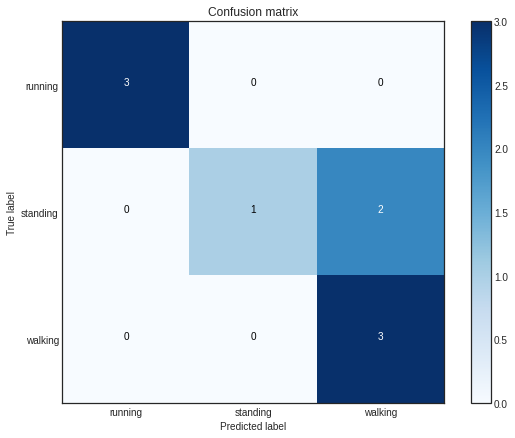

In [27]:
print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred, classes)

### 2.2. Using Sliding Window
#### 2.2.1. Load data

In [28]:
with open('/content/drive/MyDrive/HAR_slices_for_HMM.pkl', 'rb') as f:
    X, y = pickle.load(f)
print(type(X), type(y), len(X), len(y))
print(type(X[0]), X[0].shape, set(y))

<class 'list'> <class 'list'> 2940 2940
<class 'numpy.ndarray'> (150, 3) {'running', 'walking', 'standing'}


#### 2.2.2. Plot data

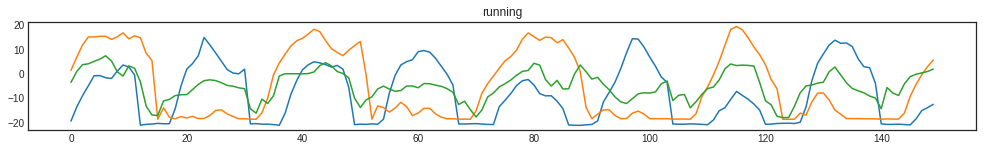

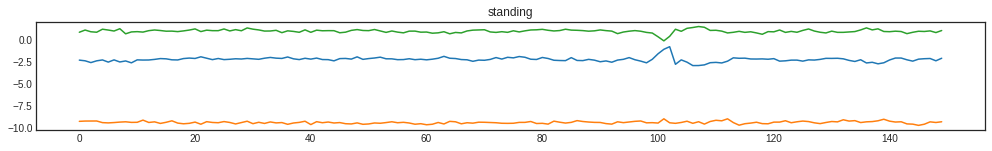

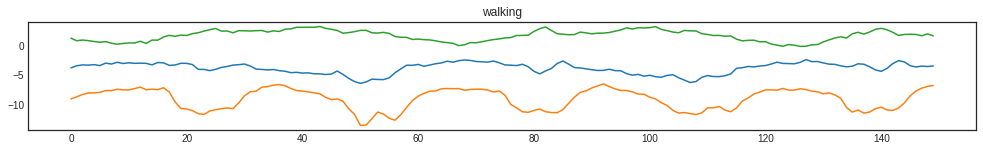

In [29]:
plt.rcParams['figure.figsize'] = (17, 2)

plt.title(y[0])
plt.plot(X[0])
plt.show()

plt.title(y[1000])
plt.plot(X[1000])
plt.show()

plt.title(y[2000])
plt.plot(X[2000])
plt.show()

#### 2.2.3. Map Label

In [30]:
# Mapping label
classes = sorted(list(set(y)))
class_to_index = {c:i for i, c in enumerate(classes)}
index_to_class = {i:c for i, c in enumerate(classes)}
print(class_to_index)

{'running': 0, 'standing': 1, 'walking': 2}


#### 2.2.4. Train Model
To fit with multiple observations, hmmlearn provides `hmm.fit(X_concat, lengths)`

In [31]:
# Make HMM models per motion classes
hmms = [GaussianHMM(n_components=5, n_iter=30)
        for c in classes]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

# Process training data
X_train_dict = defaultdict(lambda: [])
lengths_dict = defaultdict(lambda: [])
for slide, motion in zip(X_train, y_train):
    X_train_dict[motion].append(slide)
    lengths_dict[motion].append(slide.shape[0])

# Fit HMM models per motion classes
for motion in classes:
    X_concat = np.vstack(X_train_dict[motion])
    lengths = lengths_dict[motion]
    
    hmms[class_to_index[motion]].fit(X_concat, lengths)

#### 2.2.5. Test Model

In [32]:
def _predict(slide):
    '''
    Evaluate with multiple HMMs (HMM model per motion class)
    Choose most likely motion class
    '''
    probs = [hmm.score(slide) for hmm in hmms]
    index = np.argmax(probs)
    return index_to_class[index]

def predict(slides):
    return [_predict(slide) for slide in slides]
    
y_pred = predict(X_test)
y_true = y_test

              precision    recall  f1-score   support

     running       1.00      1.00      1.00       245
    standing       1.00      1.00      1.00       245
     walking       1.00      1.00      1.00       245

    accuracy                           1.00       735
   macro avg       1.00      1.00      1.00       735
weighted avg       1.00      1.00      1.00       735



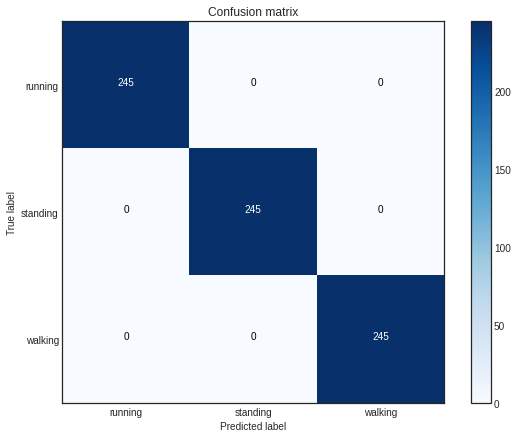

In [33]:
print(classification_report(y_true, y_pred))
plot_confusion_matrix(y_true, y_pred, classes)

## 3. Flip Coin
There are two coins, FAIR and LOADED.<br/>
Problem modeling is given in the next cell.

### 3.1. Modeling

In [34]:
hmm = MultinomialHMM(n_components=2)  # [FAIR, LOADED]

# Num of observations (Front, Back)
hmm.n_features = 2

# Model (Start probability, transition probability, emission probability)
hmm.startprob_ = [0.2, 0.8]
hmm.transmat_ = [
    [0.7, 0.3],
    [0.3, 0.7],
]
hmm.emissionprob_ = [
    [0.5, 0.5],
    [0.8, 0.2],
]

In [35]:
# Observations
X = np.array([0, 1]).reshape(-1,1)

### 3.2. Evaluation

In [36]:
# Evaluation
hmm.score(X) # return log(probability)

-1.4845689303882312

#### # Exercise - Evaluation
Calculate probability of given sequence with our own hands.

### 3.2. Decoding

In [37]:
# Decoding
hmm.decode(X)

(-2.3434070875143007, array([1, 0]))

#### # Exercise - Decoding
Estimate most likely sequence of states with given observations and model with our own hands.